In [1]:
from ZarcfitCalculations import *
import numpy as np

In [2]:
from SimPEG import Tests

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
path = "../data/HVC2014_10Grenon/"
# fnameobs = "BC13867-A 2014-10-23.z"
# fnameobs = "BC13871-B 2014-10-23.z"
# fnameobs = "BC13890A 2014-10-23.z"
# fnameobs = "BC13859 2014-10-23.z"
fnameobs = "BC13877 2014-10-28.z"
pathobs = path+fnameobs
temp = np.loadtxt(pathobs, skiprows=11, delimiter=",")
obs = temp[:,4]+1j*temp[:,5]
frequency = temp[:,0].copy()

In [5]:
zarc = ZarcfitCalculations(obs, frequency)

In [6]:
m0 = zarc.GetDefaultmodel()

In [7]:
pred0 = zarc.Zparallel(frequency)

In [103]:
dm = m0*0.1
derChk = lambda m: [zarc.dpred(m), lambda mx: zarc.Jvec(m0, mx)]
passed = Tests.checkDerivative(derChk, m0, plotIt=False, dx = m0*2, num=4)

==================== checkDerivative ====================
iter    h         |ft-f0|   |ft-f0-h*J0*dx|  Order
---------------------------------------------------------
 0   1.00e-01    6.107e+06     4.566e+06      nan
 1   1.00e-02    1.748e+05     1.948e+04      2.370
 2   1.00e-03    1.572e+04     1.814e+02      2.031
 3   1.00e-04    1.555e+03     1.801e+00      2.003
========================= PASS! =========================
Not just a pretty face Sgkang



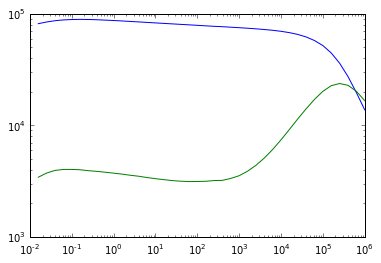

In [8]:
plt.loglog(frequency, obs.real)
plt.loglog(frequency, -obs.imag)
# plt.loglog(frequency, pred0.real)
# plt.loglog(frequency, -pred0.imag)

In [9]:
# a = np.r_[obs.real, obs.imag]
# b = np.r_[pred.real, pred.imag]
# u = abs(a)*0.05

In [10]:
# np.linalg.norm((b-a)/u)**2

In [11]:
inact = np.isnan(m0)
m0[~inact]

array([ -9.21034037,   9.21034037,  11.51292546,  11.51292546,
         0.5       ,   9.21034037,   2.30258509,   0.5       ,
         0.1       ,   6.90775528,   0.5       ,  23.02585093,
        -9.21034037,   0.5       ,   0.05      ])

In [93]:
uncert = (np.r_[0.085*abs(obs.real)+np.linalg.norm(obs.real)*5e-5, 0.0723*abs(obs.imag)+np.linalg.norm(obs.imag)*1e-6])
m1 = zarc.GN(m0, uncert, maxiter=100)

misfit: 1755.86957719 1648.64537635
0 1648.64537635
misfit: 1648.64537635 1088.85634217
1 1088.85634217
misfit: 1088.85634217 1085.95888465
2 1085.95888465
misfit: 1085.95888465 1078.40775922
3 1078.40775922
misfit: 1078.40775922 1048.82443701
4 1048.82443701
misfit: 1048.82443701 1046.58419945
5 1046.58419945
misfit: 1046.58419945 1046.05302831
6 1046.05302831
misfit: 1046.05302831 1041.05774152
7 1041.05774152
misfit: 1041.05774152 1033.72950519
8 1033.72950519
misfit: 1033.72950519 1026.98024853
9 1026.98024853
misfit: 1026.98024853 1026.56686016
10 1026.56686016
misfit: 1026.56686016 959.040094547
11 959.040094547
misfit: 959.040094547 889.430651987
12 889.430651987
misfit: 889.430651987 860.477243533
13 860.477243533
misfit: 860.477243533 771.323602691
14 771.323602691
misfit: 771.323602691 721.214658942
15 721.214658942
misfit: 721.214658942 686.197015861
16 686.197015861
misfit: 686.197015861 672.620908413
17 672.620908413
misfit: 672.620908413 656.603453199
18 656.603453199
mis

In [94]:
m0

array([ -9.21034037,   9.21034037,  11.51292546,  11.51292546,
         0.5       ,   9.21034037,   2.30258509,   0.5       ,
         0.1       ,   6.90775528,   0.5       ,  23.02585093,
        -9.21034037,   0.5       ,   0.05      ])

In [95]:
m1

array([-21.20226941,  -3.47536336,  11.01738258,  12.18725821,
         0.79793592,  11.14131179,  -1.85176255,   0.13446654,
        -3.49517181,   0.20912213,   4.08802903,  22.98857102,
        21.35799206,   4.64279358,   2.45984119])

In [96]:
print zarc.Rh, zarc.Rm, zarc.Rl

60924.0070123 0.0303435345743 68962.0608528


In [97]:
print zarc.Fh, zarc.Fm, zarc.Fl

196272.289887 1.23259552723 0.156960271824


In [98]:
print zarc.Ph, zarc.Pm, zarc.Pl

0.797935920625 4.08802903423 0.134466543468


In [99]:
pred = zarc.dpred(m1)

In [100]:
frequency.shape

(40,)

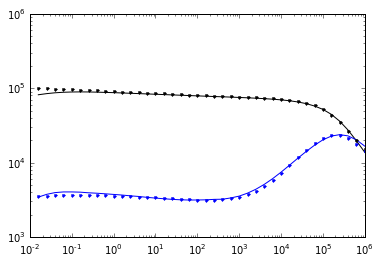

In [101]:
plt.loglog(frequency, obs.real, 'k')
plt.loglog(frequency, -obs.imag, 'b')
plt.loglog(frequency, pred[:40], 'k.')
plt.loglog(frequency, -pred[40:], 'b.')

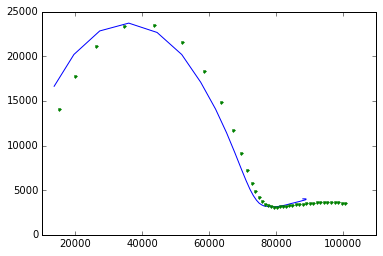

In [90]:
plt.plot(obs.real[:-3], -obs.imag[:-3])
plt.plot( pred[:40], -pred[40:], '.')
# plt.plot(pred0.real[:-3], -pred0.imag[:-3])

In [92]:
print zarc.Fh, zarc.Fm, zarc.Fl

196272.289887 1.23259552723 0.156960271824
